# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
!pip install spacy==2.2.3

     |████████████████████████████████| 10.4 MB 11.2 MB/s 
     |████████████████████████████████| 2.2 MB 56.7 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [2]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 3.0 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=978817ffa5bcaf244a6373a2895ee1f85ca386e21b98bc9cc88a949d5e847a2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-xb1vozdr/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [3]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np 

# Etapa 2: Carregamento da base de dados

In [6]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')
base_dados.shape

(196, 2)

In [7]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [8]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


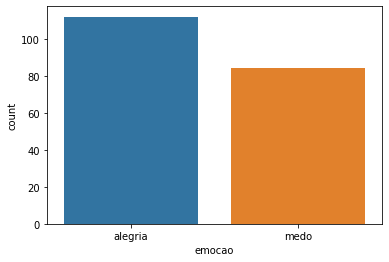

In [16]:
sns.countplot(x=base_dados['emocao'], label='Contagem');
# ';' para tirar textos de cima

# Etapa 3: Função para pré-processamento dos textos

In [18]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [21]:
print(stop_words)
len(stop_words)

{'por', 'vindo', 'uns', 'sistema', 'eles', 'favor', 'do', 'porquê', 'segundo', 'cuja', 'depois', 'minha', 'quais', 'querem', 'adeus', 'conhecida', 'ao', 'naquela', 'sexta', 'muito', 'quero', 'podem', 'outras', 'diante', 'primeira', 'ter', 'comprida', 'dar', 'diz', 'maiorias', 'meses', 'somos', 'cinco', 'elas', 'ambas', 'deve', 'isso', 'aquelas', 'lhe', 'têm', 'tentei', 'teus', 'tendes', 'daquele', 'seus', 'vários', 'ela', 'apoia', 'nada', 'próximo', 'sexto', 'estive', 'dão', 'no', 'estás', 'tudo', 'mais', 'seis', 'dezanove', 'irá', 'pouco', 'estiveram', 'te', 'forma', 'máximo', 'saber', 'sétimo', 'vossas', 'assim', 'qualquer', 'num', 'já', 'oito', 'porque', 'dezoito', 'estava', 'obrigado', 'novo', 'grupo', 'inicio', 'nova', 'obrigada', 'tipo', 'eventual', 'tarde', 'oitava', 'das', 'parte', 'vocês', 'foi', 'sob', 'fui', 'vêm', 'lado', 'dentro', 'além', 'meus', 'tentaram', 'quanto', 'daquela', 'cada', 'ir', 'fazemos', 'agora', 'bem', 'me', 'entre', 'tente', 'nível', 'debaixo', 'ser', 'me

413

In [22]:
pln = spacy.load('pt')
pln

In [41]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)
    
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  

  return lista


In [42]:
teste = preprocessamento('Estou aprendendo processamento de linguagem natural, curso em Curitiba')
teste


'aprender processamento linguagem natural cursar curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [43]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [46]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [49]:
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [50]:
exemplo_base_dados = [['este trabalho é agradável', {'ALEGRIA':True, 'MEDO':False}],
                      ['este lugar continua assustador', {'ALEGRIA':False, 'MEDO':True}]]

In [51]:
type(exemplo_base_dados)

list

In [52]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [53]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [54]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [57]:
base_dados_final = []
i = 0
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA':True, 'MEDO':False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA':False, 'MEDO':True})
  
  base_dados_final.append([texto, dic.copy()])


In [58]:
len(base_dados_final)

196

In [59]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [60]:
base_dados_final[0][0]

'trabalhar agradável'

In [61]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

# Etapa 5: Criação do classificador

In [62]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat')
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
modelo.add_pipe(categorias)
historico = []

In [64]:
modelo.begin_training()
for epoca in range(1000): # 1000 épocas 
  random.shuffle(base_dados_final) # mistura os dados
  losses = {} # cria dicionario vazio losses
  for batch in spacy.util.minibatch(base_dados_final, 30): # Atualizando os pesos de 30 em 30 registros:
                                                           #    Pega um batch de 30 registros, atribui para a rede neural, 
                                                           #    calcula os pesos e pega outros 30 registros para repetir 

    textos = [modelo(texto) for texto, entities in batch]  # Pega cada frase do batch e atribui pro modelo fazer uma previsão, 
                                                           # guardando todas as previsões em uma lista chamada textos

    annotations = [{'cats': entities} for texto, entities in batch] # Cria uma lista e coloca, para cada frase do batch, um dicionario 
                                                                    # contenco a categoria (cats)

    modelo.update(textos, annotations, losses=losses) # Fazemos o update do modelo, passando os textos, as categorias e as losses (ajustamos os pesos)

  if epoca % 100 == 0: # printamos as losses 10 vezes 
    print(losses)
    historico.append(losses)

{'textcat': 0.005753683391958475}
{'textcat': 1.2589467868195925e-07}
{'textcat': 4.5603866460908193e-08}
{'textcat': 2.2084878259498453e-08}
{'textcat': 9.983244342315345e-09}
{'textcat': 7.086426445646055e-09}
{'textcat': 6.287593501408395e-09}
{'textcat': 5.9825055465090315e-09}
{'textcat': 4.827468147450276e-09}
{'textcat': 4.706012968203055e-09}


In [67]:
print(historico)

historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

[{'textcat': 0.005753683391958475}, {'textcat': 1.2589467868195925e-07}, {'textcat': 4.5603866460908193e-08}, {'textcat': 2.2084878259498453e-08}, {'textcat': 9.983244342315345e-09}, {'textcat': 7.086426445646055e-09}, {'textcat': 6.287593501408395e-09}, {'textcat': 5.9825055465090315e-09}, {'textcat': 4.827468147450276e-09}, {'textcat': 4.706012968203055e-09}]


In [68]:
historico_loss = np.array(historico_loss)
historico_loss

array([5.75368339e-03, 1.25894679e-07, 4.56038665e-08, 2.20848783e-08,
       9.98324434e-09, 7.08642645e-09, 6.28759350e-09, 5.98250555e-09,
       4.82746815e-09, 4.70601297e-09])

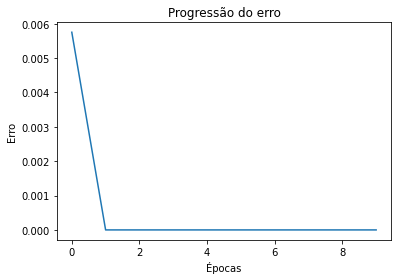

In [69]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.show()

In [70]:
modelo.to_disk('modelo')

# Etapa 6: Testes com uma frase

In [71]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [74]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [75]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [77]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [78]:
previsao.cats

{'ALEGRIA': 0.9825149774551392, 'MEDO': 0.0479605495929718}

In [79]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.00046253323671408, 'MEDO': 0.9998041987419128}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [81]:
previsoes = []
for texto in base_dados['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [82]:
previsoes

[{'ALEGRIA': 0.9996798038482666, 'MEDO': 8.673504635225981e-05},
 {'ALEGRIA': 0.999028205871582, 'MEDO': 0.0003442443849053234},
 {'ALEGRIA': 0.9993104934692383, 'MEDO': 0.00018524339247960597},
 {'ALEGRIA': 0.9994263648986816, 'MEDO': 0.0002937512472271919},
 {'ALEGRIA': 0.999671220779419, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9995881915092468, 'MEDO': 6.610646232729778e-05},
 {'ALEGRIA': 0.9996247291564941, 'MEDO': 0.0001931050792336464},
 {'ALEGRIA': 0.9997456669807434, 'MEDO': 5.89997143833898e-05},
 {'ALEGRIA': 0.999806821346283, 'MEDO': 0.0002761873765848577},
 {'ALEGRIA': 0.9995504021644592, 'MEDO': 0.000389235996408388},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9997066855430603, 'MEDO': 0.00014283960626926273},
 {'ALEGRIA': 0.9998573064804077, 'MEDO': 0.00032536170328967273},
 {'ALEGRIA': 0.9996566772460938, 'MEDO': 0.00015651767898816615},
 {'ALEGRIA': 0.9995430707931519, 'MEDO': 0.00010748927161330357},
 {'ALEGRIA': 0.9997869133

In [83]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [84]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(respostas_reais, previsoes_final)

1.0

In [86]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [100]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding='utf-8')
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [101]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [102]:
previsoes = []
for texto in base_dados_teste['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [103]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [104]:
respostas_reais = base_dados_teste['emocao'].values

In [105]:
accuracy_score(respostas_reais, previsoes_final)

0.5238095238095238

claramente temos um overfitting

In [106]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[32, 16],
       [24, 12]])